# Date-a-Scientist
### _ML Capstone Project_
***

An analysis of data from an online dating site, [OKCupid](https://www.okcupid.com/).

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import FormatStrFormatter

Get data

In [2]:
df = pd.read_csv('profiles.csv')
columns = df.columns
dtypes = df.dtypes

In [3]:
columns

Index(['age', 'body_type', 'diet', 'drinks', 'drugs', 'education', 'essay0',
       'essay1', 'essay2', 'essay3', 'essay4', 'essay5', 'essay6', 'essay7',
       'essay8', 'essay9', 'ethnicity', 'height', 'income', 'job',
       'last_online', 'location', 'offspring', 'orientation', 'pets',
       'religion', 'sex', 'sign', 'smokes', 'speaks', 'status'],
      dtype='object')

In [4]:
# Let's make a PDF of columns and sample values.
# lines = []
# for column in columns:
#     newline = ''
#     newline = newline.join(column + '\n')
#     lines.append(newline)
#     for each in list(df[column])[:5]:
#         lines.append(str(each) + '\n')
#     lines.append('**********\n')
#     lines.append('\n')
# f = open('sample_answers.txt', 'w')
# f.writelines(lines)
# f.close()

In [5]:
ages = df['age'].values.tolist()
ages_unique = list(set(ages))
ages_counts = []
for age in ages_unique:
    ages_counts.append(ages.count(age))

X, y = np.array(ages_unique[:-2]), np.array(ages_counts[:-2])

In [6]:
smokes_df = df.smokes.value_counts()
vals = smokes_df.index.values.tolist()
vals[1:3] = ['some', 'w drink']
heights = smokes_df.tolist()

In [7]:
drinks_df = df.drinks.value_counts()
vals_dr = drinks_df.index.values.tolist()
heights_dr = drinks_df.tolist()
freq = [3,1,0,2,4,5]
vals_drp = [vals_dr[x] for x in freq]
vals_drp[0], vals_drp[4:6] = 'none', ['more', 'desperate']
heights_drp = [heights_dr[x] for x in freq]

In [8]:
smokes_df = df.smokes.value_counts()
vals = smokes_df.index.values.tolist()
vals[1:3] = ['some', 'w drink']
heights = smokes_df.tolist()

In [9]:
drugs_df = df.drugs.value_counts()
vals_dg = drugs_df.index.values.tolist()
heights_dg = drugs_df.tolist()

In [10]:
smokes_df = df.smokes.value_counts()
vals = smokes_df.index.values.tolist()
vals[1:3] = ['some', 'w drink']
heights = smokes_df.tolist()

Text(0.5, 0.98, 'Who is Using the Site?')

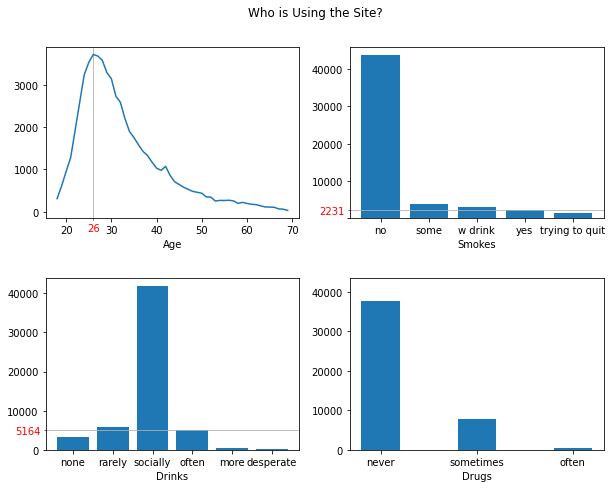

In [11]:
fig, ((ax11, ax12), (ax21, ax22)) = plt.subplots(2, 2, figsize=(10, 7))
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.2, 
                    hspace=0.35)

# age
ax11.plot(X, y)
minor_ticks11 = [X[y.argmax()]]
ax11.set_xticks(minor_ticks11, minor=True)
ax11.xaxis.set_minor_formatter(FormatStrFormatter("%d"))
ax11.xaxis.grid(True, which='minor')
ax11.get_xticklabels(minor=True)[0].set_color('red')
ax11.set_xlabel('Age')

# smoker status
ax12.bar(vals, heights)
yesses = [smokes_df['yes']]
ax12.yaxis.set_ticks([0, 10000, 20000, 30000, 40000])
ax12.set_yticklabels(['', 10000, 20000, 30000, 40000])
ax12.set_yticks(yesses, minor=True)
ax12.yaxis.set_minor_formatter(FormatStrFormatter("%d"))
ax12.yaxis.grid(True, which='minor')
ax12.get_yticklabels(minor=True)[0].set_color('red')
ax12.set_xlabel('Smokes')

# drink frequency
ax21.bar(vals_drp, heights_drp)
oftens = [drinks_df['often']]
ax21.set_yticks(oftens, minor=True)
ax21.yaxis.set_minor_formatter(FormatStrFormatter("%d"))
ax21.yaxis.grid(True, which='minor')
ax21.get_yticklabels(minor=True)[0].set_color('red')
ax21.set_xlabel('Drinks')

#drugs
ax22.bar(vals_dg, heights_dg, width=0.4)
ax22.set_ylim(0, 43500) 
ax22.set_xlabel('Drugs')

fig.suptitle('Who is Using the Site?')

In [12]:
df_income = df.income.value_counts()
incs = df_income.index.values.tolist()
inc_vals = df_income.tolist()
incs_dict = dict(zip(incs, inc_vals))
incsp = [x for x in sorted(incs_dict)]
inc_valsp = [incs_dict[x] for x in sorted(incs_dict)]
# print(incsp)
# print(inc_valsp)
incs_labels = []
for inc in incsp:
    x = str(inc)
    if (len(x) < 3): incs_labels.append('No Answer')
    elif ((len(x) >= 3) & (len(x) < 7)): incs_labels.append(x[:-3]+'K')
    elif (len(x) >= 7): incs_labels.append(x[:-6]+'M')

Text(0, 0.5, 'Yearly Income in Dollars')

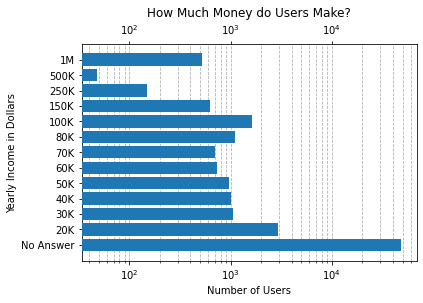

In [13]:
plt.barh(range(len(incsp)), inc_valsp, zorder=3)
plt.yticks(range(len(incsp)), labels=incs_labels)
plt.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.grid(True, zorder=0, which='both', axis='x', linestyle='--')
plt.xscale('log')
plt.title('How Much Money do Users Make?')
plt.xlabel('Number of Users')
plt.ylabel('Yearly Income in Dollars')

In [14]:
religion_df = df.religion.value_counts()
rels = religion_df.index.values.tolist()
relsp = dict()
for rel in rels:
    x = rel.split()
    if x[0] in relsp: relsp[x[0]] += religion_df[rel]
    else: relsp[x[0]] = religion_df[rel]
rev_dict = {v:k for (k,v) in relsp.items()}
relspp, num_rels = [], []
for i in sorted(rev_dict):
    num_rels.append(i)
    relspp.append(rev_dict[i])
# print(relspp, num_rels)

Text(0, 0.5, 'Religious Identities')

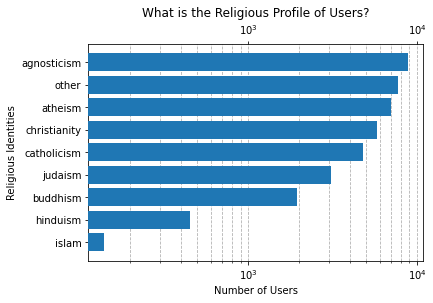

In [15]:
plt.barh(range(len(relspp)), num_rels, zorder=3)
plt.yticks(range(len(relspp)), labels=relspp)
plt.tick_params(axis="x", bottom=True, top=True, labelbottom=True, labeltop=True)
plt.grid(True, zorder=0, which='both', axis='x', linestyle='--')
plt.xscale('log')
plt.title('What is the Religious Profile of Users?')
plt.xlabel('Number of Users')
plt.ylabel('Religious Identities')

In [16]:
import geographies

In [26]:
def is_ca(loc):
    state = loc.split(',')[-1].strip(' ').title()
    if state == 'California': return state
    elif state.lower() in geographies.states_all: return 'US'
    else: return 'Abroad'

In [50]:
loc_df = pd.DataFrame(df.location.value_counts()).reset_index()
loc_df['state'] = loc_df['index'].apply(is_ca)
state_df = loc_df.groupby(['state'])['location'].sum().reset_index()
state_df.sort_values(by='location', inplace=True, ascending=False)
loc_nums = [state_df.iloc[0,1], state_df.iloc[1:,1].sum()]
labels = ['California', 'Not California']

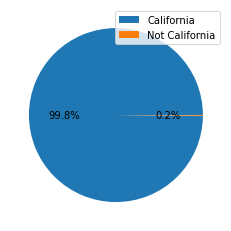

In [65]:
plt.pie(loc_nums, autopct='%.1f%%')
plt.legend(labels=labels, loc='best')

In [155]:
def eth_group(eth):
    x = eth.split(', ')
    if 'white' in x:
        if 'asian' in x:
            if 'hispanic / latin' in x:
                if len(x) == 3: return 'wah'
                else: return 'other'
            elif len(x) == 2: return 'wa'
            else: return 'other'
        elif 'hispanic / latin' in x:
            if len(x) == 2: return 'wh'
            else: return 'other'
        elif len(x) == 1: return 'w'
        else: return 'other'
    elif 'asian' in x:
        if 'hispanic / latin' in x:
            if len(x) == 2: return 'ah'
            else: return 'other'
        elif len(x) == 1: return 'a'
        else: return 'other'
    elif 'hispanic / latin' in x:
        if len(x) == 1: return 'h'
        else: return 'other'
    else: return 'other'

In [236]:
eth_df = df.ethnicity.value_counts().reset_index()
eth_df_top10 = eth_df[:17][:]
eth_nums = eth_df_top10.ethnicity.values
labels = eth_df_top10['index'].values
labelsp = []
for label in labels:
    labelsp.append(label.title())
#eth_df['index'].values

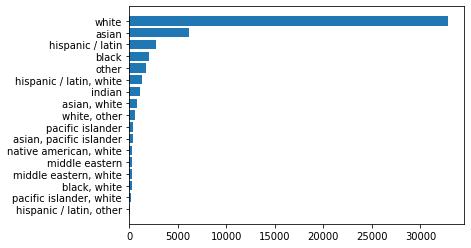

In [232]:
plt.barh(labels, eth_nums)
plt.gca().invert_yaxis()

In [305]:
eth_df['group'] = eth_df['index'].apply(eth_group)
# print(eth_df.head(20))
eth_groups_df = eth_df.groupby(['group'])['ethnicity'].sum().reset_index()
eth_groups_df.sort_values(by='ethnicity', ascending=False, inplace=True)
#print(eth_groups_df)
perc_other = eth_groups_df.loc[3, 'ethnicity'] / eth_groups_df['ethnicity'].sum()
#print((1 - perc_other) * 100)

eth_dict = pd.Series(eth_groups_df.ethnicity.values,index=eth_groups_df.group).to_dict()

In [188]:
from matplotlib_venn import venn3

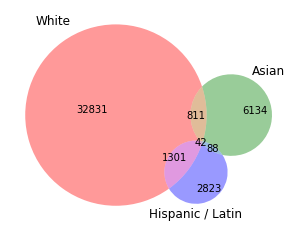

In [204]:
venn3(subsets=(eth_dict['w'], 
               eth_dict['a'], 
               eth_dict['wa'], 
               eth_dict['h'], 
               eth_dict['wh'], 
               eth_dict['ah'],
               eth_dict['wah']), 
      set_labels=('White', 'Asian', 'Hispanic / Latin'))

Text(0.5, 1.0, 'California Residents in 2022')

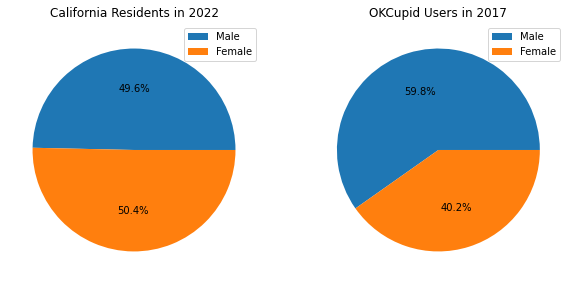

In [302]:
fig, (ax11, ax12) = plt.subplots(1, 2, figsize=(10, 7))

ax12.pie(sex_df, autopct='%.1f%%')
ax12.legend(labels=['Male', 'Female'], loc='best')
ax12.set_title('OKCupid Users in 2017')

ax11.pie([49.6, 50.3], autopct='%.1f%%')
ax11.legend(labels=['Male', 'Female'], loc='best')
ax11.set_title('California Residents in 2022')
# https://worldpopulationreview.com/state-rankings/gay-population-by-state accessed 3/18/22

In [303]:
orient_df = df.orientation.value_counts()
orient_df

straight    51606
gay          5573
bisexual     2767
Name: orientation, dtype: int64

Text(0.5, 1.0, 'California Residents in 2022')

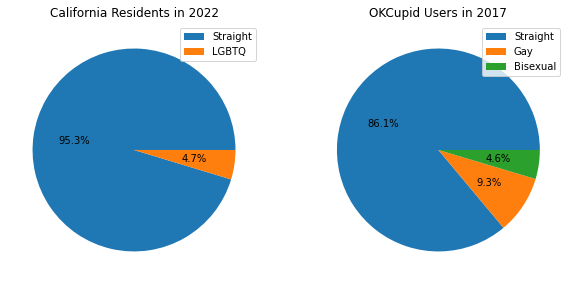

In [304]:
fig, (ax11, ax12) = plt.subplots(1, 2, figsize=(10, 7))

ax12.pie(orient_df, autopct='%.1f%%')
ax12.legend(labels=['Straight', 'Gay', 'Bisexual'])
ax12.set_title('OKCupid Users in 2017')

ax11.pie([95.313, 4.687], autopct='%.1f%%')
ax11.legend(labels=['Straight', 'LGBTQ'])
ax11.set_title('California Residents in 2022')
# https://worldpopulationreview.com/state-rankings/gay-population-by-state accessed 3/18/22

In [261]:
height_df = df.height.value_counts().reset_index()
height_df.sort_values(by='index', inplace=True, ascending=False)
print(height_df.head())
heights = height_df['index'].values
ht_nums = height_df.height.values

    index  height
23   95.0      20
33   94.0       3
57   93.0       1
48   92.0       1
35   91.0       3


Text(0.5, 1.0, 'How Tall are Users of OKCupid?')

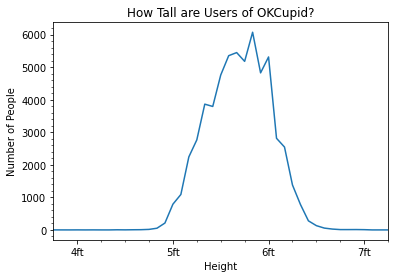

In [287]:
plt.plot(heights, ht_nums)
plt.xlim(45, 87)
plt.xticks([48,60,72,84], labels=['4ft', '5ft', '6ft', '7ft'])
plt.minorticks_on()
plt.xlabel('Height')
plt.ylabel('Number of People')
plt.title('How Tall are Users of OKCupid?')

In [306]:
kids_df = df.offspring.value_counts()

In [307]:
kids_df

doesn&rsquo;t have kids                                7560
doesn&rsquo;t have kids, but might want them           3875
doesn&rsquo;t have kids, but wants them                3565
doesn&rsquo;t want kids                                2927
has kids                                               1883
has a kid                                              1881
doesn&rsquo;t have kids, and doesn&rsquo;t want any    1132
has kids, but doesn&rsquo;t want more                   442
has a kid, but doesn&rsquo;t want more                  275
has a kid, and might want more                          231
wants kids                                              225
might want kids                                         182
has kids, and might want more                           115
has a kid, and wants more                                71
has kids, and wants more                                 21
Name: offspring, dtype: int64